## 1.Problem Statement
>Given Clinical parameters we need to identify whether the patient has the heart disease or no

## 2. Data
The original data came from cleveland.

Reference: https://www.kaggle.com/ronitf/heart-disease-uci/data

## 3. Evaluation

> if we can reach 95% accuracy in predict whether or not they have heart disease then we are good

## 4. Features
Create Data dictionary:
1. age in years
2. sex(1 = male; 0 = female)
3. cp chest pain type:
    1. Value 1: typical angina
    2. Value 2: atypical angina
    3. Value 3: non-anginal pain
    4. Value 4: asymptomatic
4. trestbps resting blood pressure (in mm Hg on admission to the hospital)
5. chol serum cholestoral in mg/dl
6. fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg resting electrocardiographic results
8. thalach maximum heart rate achieved
9. exang exercise induced angina (1 = yes; 0 = no)
10. oldpeak ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. canumber of major vessels (0-3) colored by flourosopy
13. thal3 = normal; 6 = fixed defect; 7 = reversable defect
14. target1 or 0

In [1]:
# import al the models correctly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model selection and evaluation
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv("heart.csv")
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

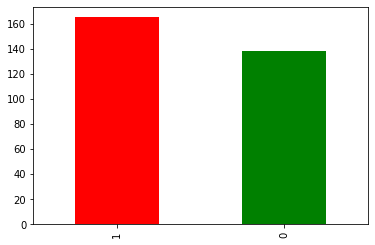

In [4]:
df["target"].value_counts().plot(kind="bar", color=["red","green"]);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
# compare the values
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


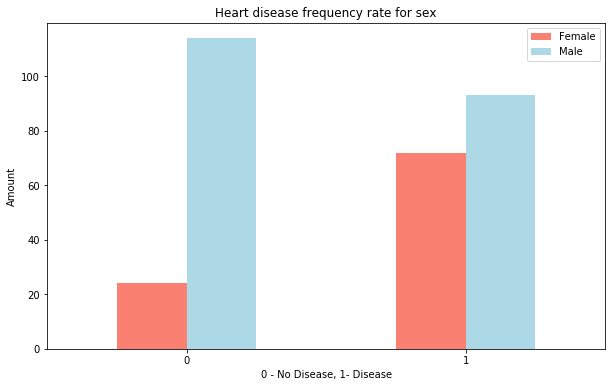

In [9]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=[10,6],color=["salmon","lightblue"])
plt.title("Heart disease frequency rate for sex")
plt.xlabel("0 - No Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [10]:
df[df.age<50][df["target"]==1]["thalach"].describe()

<ipython-input-10-9cc03fecb175>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.age<50][df["target"]==1]["thalach"].describe()


count     62.000000
mean     168.532258
std       15.372658
min      122.000000
25%      161.250000
50%      172.000000
75%      179.000000
max      202.000000
Name: thalach, dtype: float64

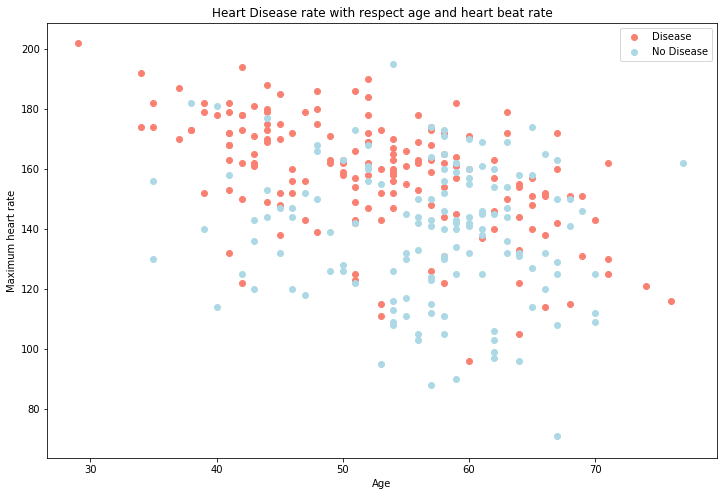

In [11]:
plt.figure(figsize=[12,8])
plt.scatter(df.age[df["target"]==1],df.thalach[df["target"]==1], c="salmon")
plt.scatter(df.age[df["target"]==0],df.thalach[df["target"]==0], c="lightblue")
plt.title("Heart Disease rate with respect age and heart beat rate")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.legend(["Disease","No Disease"]);

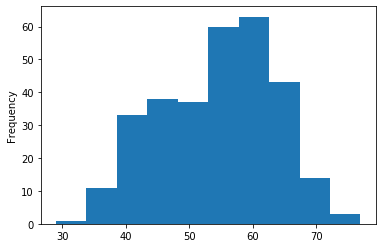

In [12]:
df.age.plot(kind="hist");

In [ ]:
pd.crosstab(df.cp,df.target)

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["Salmon","lightblue"])
plt.title("Heart disease frequency with chest pain type")
plt.legend(["No Disease","Disease"])
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [ ]:
df.head()

### Building a correlation Matrix

In [4]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


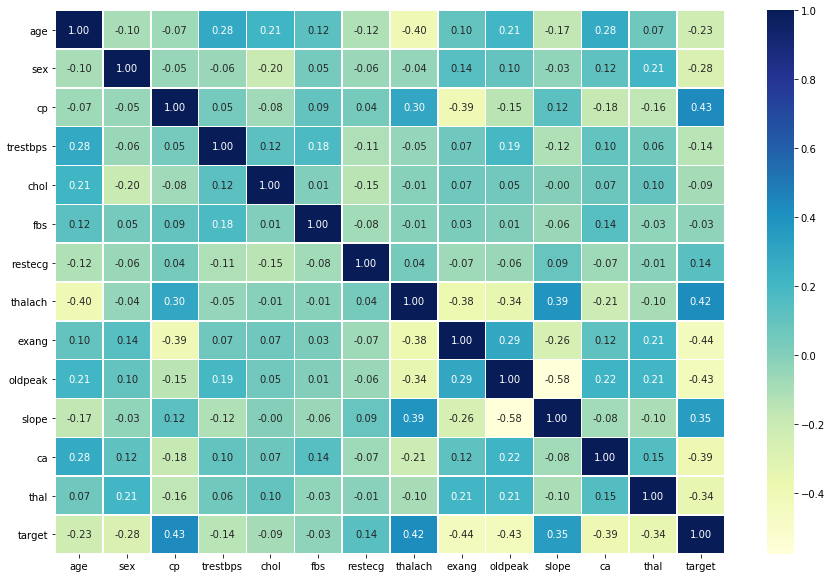

In [5]:
corr_mat=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [174]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [200]:
x=df.drop("target",axis=1)

In [201]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [202]:
import sklearn
np.random.seed(42)
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)
cls=sklearn.ensemble.RandomForestClassifier()
cls.fit(x_train,y_train)
cls.score(x_test,y_test)

0.8524590163934426

In [203]:
import sklearn
np.random.seed(42)
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)
cls=sklearn.linear_model.LogisticRegression()
cls.fit(x_train,y_train)
cls.score(x_test,y_test)

C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [204]:
cls.coef_

array([[ 0.01409301, -1.11713301,  0.78204326, -0.01144372, -0.00203277,
         0.00138337,  0.48266918,  0.02581627, -0.77915027, -0.69536303,
         0.58280331, -0.75474482, -0.9692382 ]])

In [205]:
cls.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

### 3 different models
1. Logistic Regression
2. K-nearest neighbours
3. Random Forest Classifier

In [206]:
# Put models in a dictionary
import sklearn
models={"logistic regression": sklearn.linear_model.LogisticRegression(),
       "KNN": sklearn.neighbors.KNeighborsClassifier(),
       "Random Forest Classifier": sklearn.ensemble.RandomForestClassifier()}
# Create fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [207]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

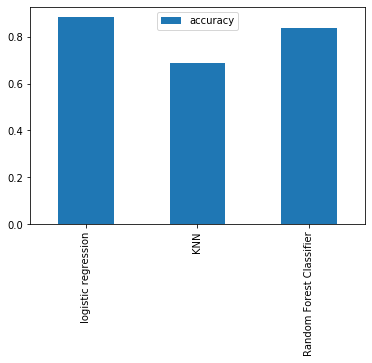

In [208]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"]).T
model_compare.plot.bar()

### Hyper Parameter tuning for Random Forest Classifier

In [209]:
from sklearn.metrics import classification_report,confusion_matrix

In [210]:
cls=sklearn.ensemble.RandomForestClassifier()
cls.fit(x_train,y_train)
cls.score(x_test,y_test)

0.8524590163934426

In [211]:
cls.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [212]:
a=np.arange(50,200,10)
a

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])

In [213]:
tuning_parameters={"n_estimators":np.arange(50,200,10),
                  "max_features":["auto","log2"]}
gs_cls=sklearn.model_selection.GridSearchCV(cls,tuning_parameters,cv=5,verbose=2)
gs_cls.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... max_features=auto, n_estimators=50, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.1s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] ............... max_features=auto, n_estimators=50, total=   0.1s
[CV] max_features=auto, n_estimators=60 ..............................
[CV] ............... max_features=auto, n_estimators=60, total=   0.1s
[CV] max_features=auto, n_estimators=60 ..............................
[CV] ............... max_features=auto, n_estimators=60, total=   0.1s
[CV] max_features=auto, n_estimators=60 ..............................
[CV] ............... max_features=auto, n_estimators=60, total=   0.1s
[CV] max_features=auto, n_estimators=60 ..............................
[CV] ............... max_features=auto, n_estimators=60, total=   0.2s
[CV] max_features=auto, n_estimators=60 ..............................
[CV] .

[CV] .............. max_features=auto, n_estimators=170, total=   0.3s
[CV] max_features=auto, n_estimators=170 .............................
[CV] .............. max_features=auto, n_estimators=170, total=   0.3s
[CV] max_features=auto, n_estimators=170 .............................
[CV] .............. max_features=auto, n_estimators=170, total=   0.4s
[CV] max_features=auto, n_estimators=170 .............................
[CV] .............. max_features=auto, n_estimators=170, total=   0.3s
[CV] max_features=auto, n_estimators=170 .............................
[CV] .............. max_features=auto, n_estimators=170, total=   0.3s
[CV] max_features=auto, n_estimators=180 .............................
[CV] .............. max_features=auto, n_estimators=180, total=   0.4s
[CV] max_features=auto, n_estimators=180 .............................
[CV] .............. max_features=auto, n_estimators=180, total=   0.4s
[CV] max_features=auto, n_estimators=180 .............................
[CV] .

[CV] .............. max_features=log2, n_estimators=130, total=   0.7s
[CV] max_features=log2, n_estimators=130 .............................
[CV] .............. max_features=log2, n_estimators=130, total=   0.4s
[CV] max_features=log2, n_estimators=140 .............................
[CV] .............. max_features=log2, n_estimators=140, total=   0.8s
[CV] max_features=log2, n_estimators=140 .............................
[CV] .............. max_features=log2, n_estimators=140, total=   0.8s
[CV] max_features=log2, n_estimators=140 .............................
[CV] .............. max_features=log2, n_estimators=140, total=   0.8s
[CV] max_features=log2, n_estimators=140 .............................
[CV] .............. max_features=log2, n_estimators=140, total=   0.8s
[CV] max_features=log2, n_estimators=140 .............................
[CV] .............. max_features=log2, n_estimators=140, total=   0.7s
[CV] max_features=log2, n_estimators=150 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   50.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [192]:
gs_cls.score(x_test,y_test)

0.8688524590163934

In [193]:
gs_cls.best_params_

{'max_features': 'log2', 'n_estimators': 120}

In [157]:
cls_log=sklearn.linear_model.LogisticRegression(max_iter=50,solver='lbfgs')
cls_log.fit(x_train,y_train)
cls_log.score(x_test,y_test)

C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [142]:
cls_log.coef_

array([[ 0.00568641, -0.46395324,  0.87313243, -0.01056621, -0.00120085,
         0.03286673,  0.06218069,  0.02186182, -0.40122037, -0.93924033,
         0.3463156 , -0.76139181, -0.56250872]])

In [194]:
tuning_params={"solver" :["lbfgs", "liblinear"],
              "penalty": ["l2", "none"],
              "max_iter": [50]}
cls_gs_log=sklearn.model_selection.GridSearchCV(cls_log,tuning_params, cv=5, verbose=2)
cls_gs_log.fit(x_test,y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_iter=50, penalty=l2, solver=lbfgs ...........................
[CV] ............ max_iter=50, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=l2, solver=lbfgs ...........................
[CV] ............ max_iter=50, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=l2, solver=lbfgs ...........................
[CV] ............ max_iter=50, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=l2, solver=lbfgs ...........................
[CV] ............ max_iter=50, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=l2, solver=lbfgs ...........................
[CV] ............ max_iter=50, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=l2, solver=liblinear .......................
[CV] ........ max_iter=50, penalty=l2, solver=liblinear, total=   0.0s
[CV] max_iter=50, penalty=l2, solver=liblinear .......................
[CV] ........ max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

[CV] .......... max_iter=50, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=none, solver=lbfgs .........................
[CV] .......... max_iter=50, penalty=none, solver=lbfgs, total=   0.0s
[CV] max_iter=50, penalty=none, solver=liblinear .....................
[CV] ...... max_iter=50, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=50, penalty=none, solver=liblinear .....................
[CV] ...... max_iter=50, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=50, penalty=none, solver=liblinear .....................
[CV] ...... max_iter=50, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=50, penalty=none, solver=liblinear .....................
[CV] ...... max_iter=50, penalty=none, solver=liblinear, total=   0.0s
[CV] max_iter=50, penalty=none, solver=liblinear .....................
[CV] ...... max_iter=50, penalty=none, solver=liblinear, total=   0.0s


C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shravani\Desktop\new_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=50, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [50], 'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [214]:
cls_gs_log.score(x_test,y_test)

ValueError: X has 13 features per sample; expecting 12

In [ ]:
cls_gs_log.best_params_

In [ ]:
y_pred=cls_gs_log.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
y_pred